In [ ]:
# connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import itertools

In [ ]:
# reading the train dataset
train_df = pd.read_csv('/content/drive/MyDrive/SEM6/NLP/Project/data/train.csv')
train_df.head()

,headline,label
0,"CWG18; ಕುಸ್ತಿಯಲ್ಲಿ ಚಿನ್ನಗಳಿಸಿದ ರಾಹುಲ್ ಅವಾರೆ, ಸ...",sports
1,ಏಷ್ಯಾ ಕಪ್ 2018: ಪಾಕ್ ವಿರುದ್ಧ ಘರ್ಜಿಸಲು ರೋಹಿತ್ ಸ...,sports
2,ಸಮಂತಾ ವಿಷಯದಲ್ಲಿ 'ಯೂ ಟರ್ನ್'​ ಹೊಡೆದ ನಾಗ ಚೈತನ್ಯ..!,entertainment
3,PHOTOS: ಐಶ್ ಬೇಬಿ ಸೌಂದರ್ಯದ ಗುಟ್ಟು ರಟ್ಟು: 40 ದಾಟ...,entertainment
4,ಟೀಂ ಇಂಡಿಯಾ ಆಯ್ಕೆ ಸಮಿತಿ ಸದಸ್ಯರ ಸಂಭಾವನೆ ಎಷ್ಟು ಗೊ...,sports


In [ ]:
# reading the test dataset
test_df = pd.read_csv('/content/drive/MyDrive/SEM6/NLP/Project/data/test.csv')
test_df.head()

,headline,label
0,ಬಜಾರ್ ಅಂಗಳದಲ್ಲಿ ಸಿಕ್ಕ ಧನ್ವೀರ್​,entertainment
1,ಬಿಡುಗಡೆಯಾಯಿತು ಕಿಚ್ಚ ಸುದೀಪ್​ ಕಂಠದಾನ ಮಾಡಿರುವ ಸಿನ...,entertainment
2,"ಸ್ಮಿತ್, ವಾರ್ನರ್​, ಬ್ಯಾಂಕ್ರಾಫ್ಟ್​ಗೆ ಶಿಕ್ಷೆ ಕಡಿತ...",sports
3,ಬೆಂಗಳೂರು ಅಂತರ ರಾಷ್ಟ್ರೀಯ ಚಲನಚಿತ್ರೋತ್ಸವದಲ್ಲಿ ಏಷ್...,entertainment
4,ಜಿಯೋ ಭರ್ಜರಿ ಗಿಫ್ಟ್​: ಇಂದಿನಿಂದಲೇ 5 ವರ್ಷಗಳ ಕಾಲ ಉ...,tech


In [ ]:
# printing the number of rows in training and testing set
print(len(train_df))
print(len(test_df))

5167
1293


In [ ]:
# printing the types of classes and their count
train_df['label'].value_counts()

entertainment    2710
sports           1856
tech              601
Name: label, dtype: int64

In [ ]:
# checking for null values in the training set
train_df.isnull().sum()

headline    0
label       0
dtype: int64

In [ ]:
# checking for null values in the testig set
test_df.isnull().sum()

headline    0
label       0
dtype: int64

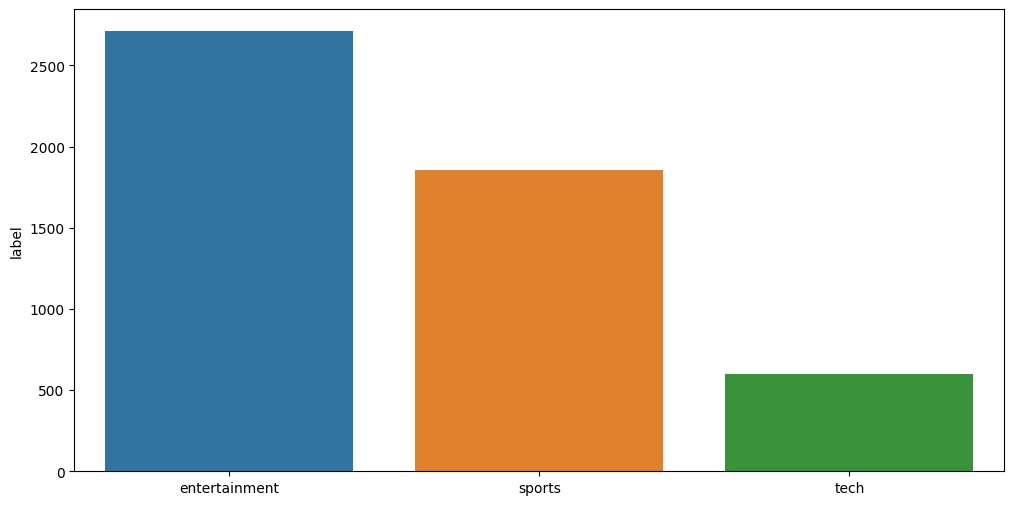

In [ ]:
#plotting bar graph for number of instances in each class of the training set
plt.figure(figsize = (12, 6))
train_data = train_df.label.value_counts()
sns.barplot(y = train_data, x = train_data.index, orient = 'v')
plt.show()

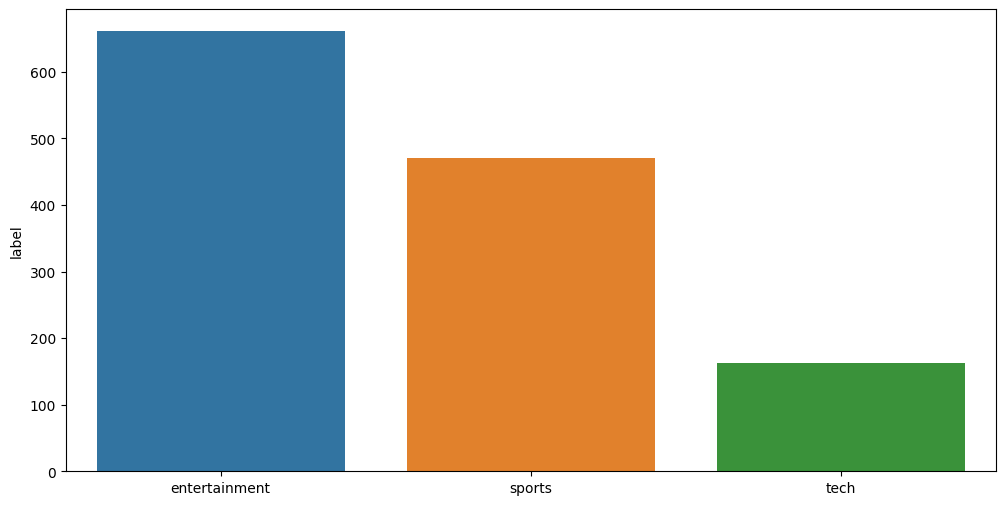

In [ ]:
#plotting bar graph for number of instances in each class of the testing set
plt.figure(figsize = (12, 6))
test_data = test_df.label.value_counts()
sns.barplot(y = test_data, x = test_data.index, orient = 'v')
plt.show()

In [ ]:
# printing the top 20 words in the training dataset
x_train = train_df.iloc[:, 0]
y_train = train_df.iloc[:, 1]
top_words_train = {}
top_words_train_list = []
for i in x_train:
  i = i.split(' ')
  for j in i:
    if j not in top_words_train:
      top_words_train[j] = 0
    top_words_train[j] = top_words_train[j] + 1
for key, val in sorted(top_words_train.items(), key = lambda x: x[1], reverse = True)[1:21]:
  top_words_train_list.append(key)
for i, word in enumerate(top_words_train_list):
   print(str(i + 1) + '.' + word)
top_words_train = dict(sorted(top_words_train.items(), key = lambda item: item[1], reverse = True))

1.ಹೊಸ
2.ವಿರುದ್ಧ
3.2018:
4.ಸಿನಿಮಾ
5.ಭಾರತ
6.ನಟಿ
7.ಮೊದಲ
8.ನಟ
9.ಕೊಹ್ಲಿ
10.ಗೊತ್ತಾ?
11.ಭರ್ಜರಿ
12.PHOTOS:
13.ಜಯ
14.ಸಿನಿಮಾದ
15.ಟೀಂ
16.vs
17.ಮಾಡಿದ
18.ವಿಶ್ವಕಪ್
19.ಐಪಿಎಲ್
20.ಭಾರತಕ್ಕೆ


In [ ]:
# priting the number of occurences of the words in the training dataset
print(top_words_train)

{'ಈ': 283, 'ಹೊಸ': 233, 'ವಿರುದ್ಧ': 219, '2018:': 218, 'ಸಿನಿಮಾ': 187, 'ಭಾರತ': 169, 'ನಟಿ': 157, 'ಮೊದಲ': 153, 'ನಟ': 142, 'ಕೊಹ್ಲಿ': 141, 'ಗೊತ್ತಾ?': 140, 'ಭರ್ಜರಿ': 138, 'PHOTOS:': 133, 'ಜಯ': 120, 'ಸಿನಿಮಾದ': 119, 'ಟೀಂ': 118, 'vs': 112, 'ಮಾಡಿದ': 110, 'ವಿಶ್ವಕಪ್': 106, 'ಐಪಿಎಲ್': 102, 'ಭಾರತಕ್ಕೆ': 101, 'ಹಾಗೂ': 99, 'Video:': 98, 'ಬಗ್ಗೆ': 96, 'ಫಿಫಾ': 91, 'ಬಿಡುಗಡೆ': 90, 'ಇಂಡಿಯಾ': 88, 'ಕ್ರಿಕೆಟ್': 86, 'ಅವರ': 85, 'ಕೆಲ': 81, '': 80, 'ಚಿತ್ರಗಳು': 78, 'ಇಲ್ಲಿದೆ': 77, 'ಮೇಲೆ': 77, 'ಮತ್ತೆ': 76, 'ದಾಖಲೆ': 76, 'ಈಗ': 75, 'ಅಭಿನಯದ': 75, 'ಭಾರತದ': 72, 'ಕೋಟಿ': 71, 'ವಿಡಿಯೋ': 71, 'ಸರಣಿ': 69, 'ನೀಡಿದ': 66, 'ಸ್ಟಾರ್\u200b': 66, 'ಚಿತ್ರದ': 66, 'ಧೋನಿ': 64, 'ವೈರಲ್': 63, 'ದರ್ಶನ್\u200b': 61, 'ಇಂದು': 61, 'ನಡುವಣ': 60, 'ರೋಚಕ': 60, '5': 57, 'ಪಂದ್ಯ': 57, 'ಚಿತ್ರ': 57, '2ನೇ': 57, 'ತಂಡ': 56, 'ವಿರಾಟ್': 56, 'ಸ್ಟಾರ್': 55, 'ಬಳಿಕ': 54, 'ವರ್ಷದ': 53, 'ಪಂದ್ಯದಲ್ಲಿ': 53, ':': 53, 'ಪಂದ್ಯದ': 53, 'ನಿಮ್ಮ': 53, '!': 52, 'ಎಂದ': 51, 'ತೆರೆ': 51, 'ಯಾರು': 51, 'ಜೊತೆ': 51, 'ಏಷ್ಯನ್': 50, 'ಬಾಲಿವುಡ್': 50, 'ಗೊತ್ತಾ..?': 49, 'ಏಕದಿನ': 49, 'ಕೇವಲ': 49, 'ಪಂದ್ಯಗಳ': 48, 'ಮ

In [ ]:
# printing the top 20 words in the testing dataset
x_test = test_df.iloc[:, 0]
y_test = test_df.iloc[:, 1]
top_words_test = {}
top_words_test_list = []
for i in x_test:
  i = i.split(' ')
  for j in i:
    if j not in top_words_test:
      top_words_test[j] = 0
    top_words_test[j] = top_words_test[j] + 1
for key, val in sorted(top_words_test.items(), key = lambda x: x[1], reverse = True)[1:21]:
  top_words_test_list.append(key)
for i, word in enumerate(top_words_test_list):
   print(str(i + 1) + '.' + word)
top_words_test = dict(sorted(top_words_test.items(), key = lambda item: item[1], reverse = True))

1.ಹೊಸ
2.ನಟಿ
3.2018:
4.ವಿರುದ್ಧ
5.ಗೊತ್ತಾ?
6.ಮೊದಲ
7.ಭಾರತ
8.ಕೊಹ್ಲಿ
9.ನಟ
10.ಸಿನಿಮಾ
11.ಭರ್ಜರಿ
12.PHOTOS:
13.ಸಿನಿಮಾದ
14.ಟೀಂ
15.ವಿಶ್ವಕಪ್
16.ಐಪಿಎಲ್
17.ಭಾರತಕ್ಕೆ
18.ವಿಡಿಯೋ
19.ಹಾಗೂ
20.ಇಂಡಿಯಾ


In [ ]:
# priting the number of occurences of the top 20 words in the testing dataset
print(top_words_test)

{'ಈ': 73, 'ಹೊಸ': 58, 'ನಟಿ': 50, '2018:': 48, 'ವಿರುದ್ಧ': 47, 'ಗೊತ್ತಾ?': 40, 'ಮೊದಲ': 40, 'ಭಾರತ': 39, 'ಕೊಹ್ಲಿ': 38, 'ನಟ': 37, 'ಸಿನಿಮಾ': 34, 'ಭರ್ಜರಿ': 33, 'PHOTOS:': 33, 'ಸಿನಿಮಾದ': 32, 'ಟೀಂ': 32, 'ವಿಶ್ವಕಪ್': 30, 'ಐಪಿಎಲ್': 28, 'ಭಾರತಕ್ಕೆ': 26, 'ವಿಡಿಯೋ': 25, 'ಹಾಗೂ': 25, 'ಇಂಡಿಯಾ': 25, 'ಮಾಡಿದ': 25, 'vs': 25, 'ಫಿಫಾ': 24, 'ಮೇಲೆ': 23, 'ವಿರಾಟ್': 23, 'ಸ್ಟಾರ್': 23, 'ಅವರ': 22, 'ನಡುವಣ': 22, 'ಚಿತ್ರ': 22, 'ಪಂದ್ಯದ': 21, 'ಒಂದು': 21, '': 20, 'ಕ್ರಿಕೆಟ್': 20, 'ದಾಖಲೆ': 20, 'ನೀಡಿದ': 20, 'ಎಂದ': 19, 'ಕೆಲ': 19, 'ಚಿತ್ರಗಳು': 19, 'ಚಿತ್ರಪಟಗಳು': 19, 'ಇಲ್ಲಿದೆ': 19, 'ಧೋನಿ': 19, 'ಅಭಿನಯದ': 18, 'ಬಿಡುಗಡೆ': 17, 'ವರ್ಷದ': 17, 'ಜಯ': 17, 'ಬಗ್ಗೆ': 17, 'ಕೊಟ್ಟ': 17, 'ಸ್ಟಾರ್\u200b': 17, 'ಮತ್ತು': 16, 'ಏಕದಿನ': 16, 'ಈಗ': 16, 'ಬಳಿಕ': 16, 'ವೈರಲ್': 15, '2ನೇ': 15, 'ಭಾರತದ': 15, 'ಮಾಜಿ': 15, 'Video:': 15, 'India': 15, 'ಕನ್ನಡ': 15, 'ಪಂದ್ಯಗಳ': 15, 'ಆದ': 15, 'ವಾರ': 14, 'ಜತೆ': 14, 'ನಂತರ': 14, 'ಗೆದ್ದ': 13, 'ಭಾರತ-ಇಂಗ್ಲೆಂಡ್': 13, 'ಮತ್ತೆ': 13, 'ಇಂದು': 13, 'ಭಾರತೀಯ': 13, 'ಪಂದ್ಯ': 13, 'ಟಿ-20': 13, 'ಪಂದ್ಯದಲ್ಲಿ': 13, 'ಫೋಟೋ': 13, 'ಏಷ್ಯಾ': 13, 'ಕೇವಲ': 13, 'ಕ

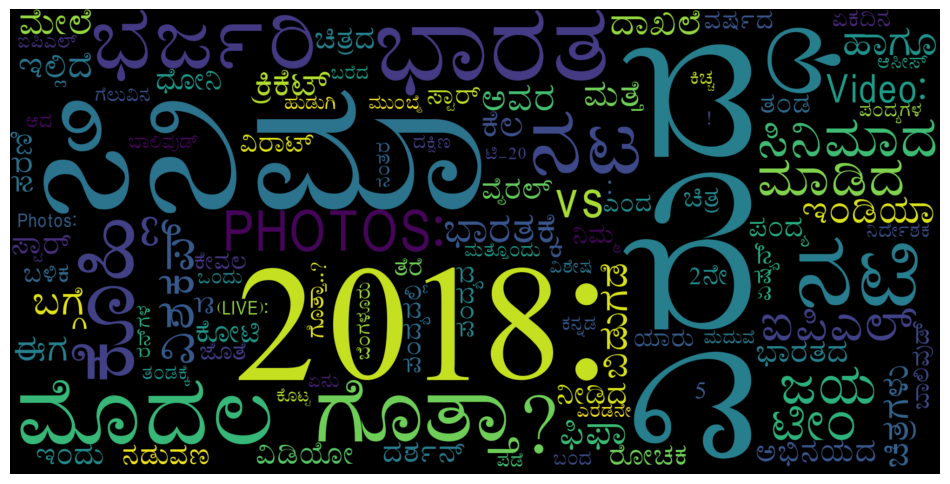

In [ ]:
# plotting word cloud for the headline in training set
train_df_dict = dict(itertools.islice(top_words_train.items(), 2, 103))
font = '/content/drive/MyDrive/SEM6/NLP/Project/data/fonts/Kar-Chandrashekhara-Kambara.ttf'
wordcloud = WordCloud(width = 2000, height = 1000, max_font_size = 400, font_path = font).generate_from_frequencies(train_df_dict)
plt.figure(figsize = (12, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

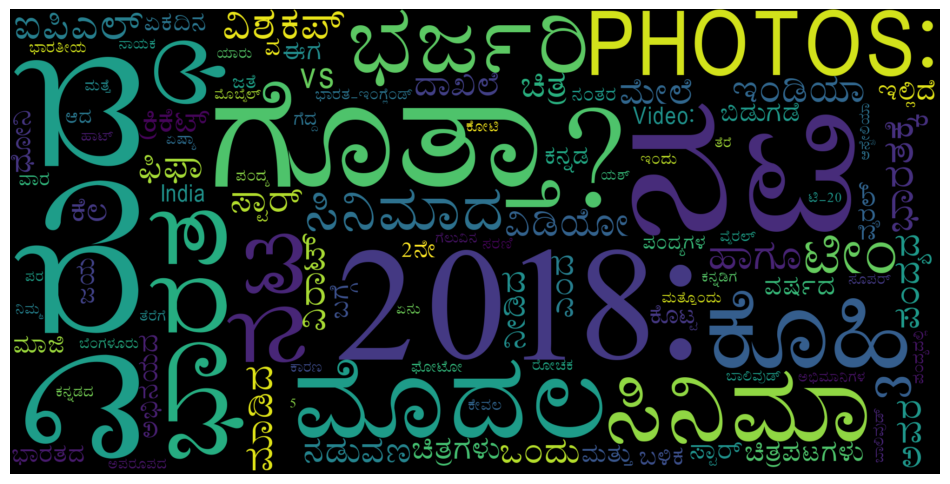

In [ ]:
# plotting word cloud for the headline in testing set
test_df_dict = dict(itertools.islice(top_words_test.items(), 2, 103))
font = '/content/drive/MyDrive/SEM6/NLP/Project/data/fonts/Kar-Chandrashekhara-Kambara.ttf'
wordcloud = WordCloud(width = 2000, height = 1000, max_font_size = 400, font_path = font).generate_from_frequencies(test_df_dict)
plt.figure(figsize = (12, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

<Axes: ylabel='Frequency'>

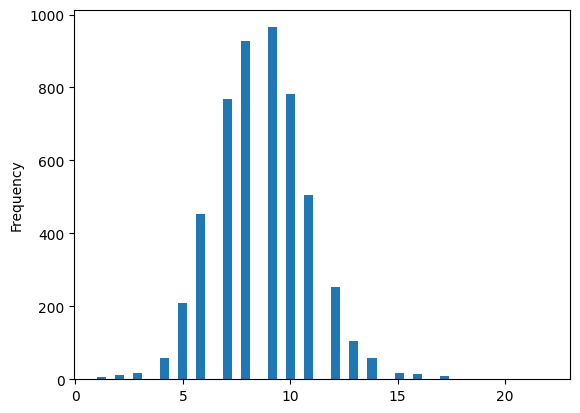

In [ ]:
# plotting length of sentences in headline of training set
x_train = list(train_df['headline'].values)
train_length = list(map(lambda x: len(x.split(' ')), x_train))
train_df['length'] = train_length
train_df['length'].plot(bins = 50, kind = 'hist')

<Axes: ylabel='Frequency'>

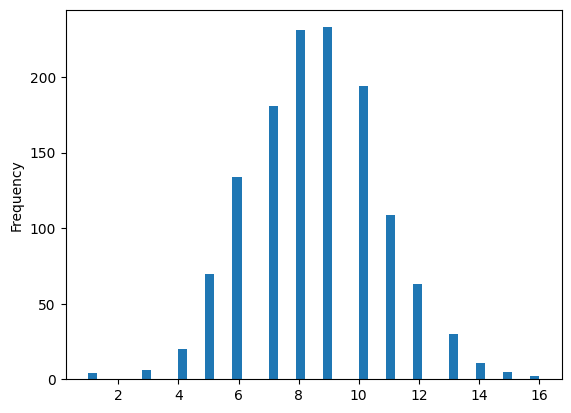

In [ ]:
# plotting length of sentences in headline of testing set
x_test = list(test_df['headline'].values)
test_length = list(map(lambda x: len(x.split(' ')), x_test))
test_df['length'] = test_length
test_df['length'].plot(bins = 50, kind = 'hist')